<a href="https://colab.research.google.com/github/toupasana/Unsupervised-ML/blob/main/Copy_of_ZOMATO_RESTAURANT_CLUSTERING_AND_SENTIMENT_ANALYSIS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part

1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

<b>Exploratory Data Analysis on Zomato Dataset</b><br>
 – Loading the Dataset <br>
 – Data Columns<br>
 – Duplicated function<br>
 – Information of data<br>
 – Reading column names<br>
 – Changing the column names<br>
 – Transformation in Data Type<br>
 – Changing cost to float<br>
 – Reading rate of dataset<br>
 – Removing from rate<br>
 – Adjust the column<br>
 – Encode the input variation<br>
 – Co-relation between different variations<br>
 – Column /name<br>
 – Data Visualization<br>
 – Table Booking Rate vs Rate<br>
 – Location<br>
 – Location vs Rating<br>
 – Restaurant type<br>
 – Gaussian rest type and rating<br>
 – Type of Service <br>
 – Type and Rating<br>
 – Cost of restaurant<br>
 – No.of restaurant in the location<br>
 – Type of Restaurant<br>
 – Most famous restaurant chains <br>


In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing all the libraries which are requied to do EDA and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('dark_background')

These are the libraries which I am using for EDA and Visualization.

* Pandas : a software library written for the Python programming language for data manipulation and analysis

* Numpy : a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

* Matplotlib : a plotting library for the Python programming language and its numerical mathematics extension NumPy.

* Seaborn : a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

### Loading the Dataset

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
restaurant = pd.read_csv("/content/drive/MyDrive/Capstone Project/Unsupervised Machine Learning /Zomato Restaurant names and Metadata.csv")
restaurant.head()


,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [5]:
restaurant.shape

(105, 6)

In [6]:
restaurant.columns

Index(['Name', 'Links', 'Cost', 'Collections', 'Cuisines', 'Timings'], dtype='object')

We can see that there are 105 rows of Data and 6 Columns

In [7]:
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


When we looked into the information of the data we can see some values are missing in different columns Collection,timing(for one)



In [8]:
#Checking the nullm values in dataset
restaurant.isna().sum()

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [9]:
[features for features in restaurant.columns if restaurant[features].isnull().sum()>0]  

['Collections', 'Timings']

In [10]:
# Lets find the total number of null values

restaurant.isnull().sum().sum()
print('The total number of null values in the whole dataset is {}.'.format(restaurant.isnull().sum().sum()))

The total number of null values in the whole dataset is 55.


In [11]:
#print('Convert the 'Cost' column, deleting the comma and changing the data type into 'int64'')
restaurant['Cost'] = restaurant['Cost'].str.replace(",","").astype('int64')

In [12]:
#restaurant['Timings'].unique()

In [13]:
#plot the null values
#sns.heatmap(restaurant.isnull(),yticklabels=False, cbar=False,cmap='viridis')
plt.show()

In [14]:
#Check the all data info
restaurant.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    int64 
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: int64(1), object(5)
memory usage: 5.0+ KB


In [15]:
# Examine Statistics
restaurant.describe()

,Cost
count,105.000000
mean,861.428571
std,510.149730
min,150.000000
25%,500.000000
50%,700.000000
75%,1200.000000
max,2800.000000


Review Dataset Preprosesing

In [16]:
review =pd.read_csv("/content/drive/MyDrive/Capstone Project/Unsupervised Machine Learning /Zomato Restaurant reviews.csv")
review.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [17]:
review.columns

Index(['Restaurant', 'Reviewer', 'Review', 'Rating', 'Metadata', 'Time',
       'Pictures'],
      dtype='object')

In [18]:
review.shape

(10000, 7)

In [19]:
print('The total number of null values in the whole dataset is {}.'.format(review.isnull().sum().sum()))

The total number of null values in the whole dataset is 197.


In [20]:
[features for features in review.columns if review[features].isnull().sum()>0] 

['Reviewer', 'Review', 'Rating', 'Metadata', 'Time']

In [21]:
review.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

As we can see, there are few missing values compared to the shape of the dataset so I decide to drop them all because there isn't a big loss

In [22]:
#Droping the null value data
#review.dropna(inplace = True)
#review.info()

In [23]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [24]:
#Check the review column
review['Rating'].unique()

array(['5', '4', '1', '3', '2', '3.5', '4.5', '2.5', '1.5', 'Like', nan],
      dtype=object)

rating of the restaurent out of 5.

So, We can see in the above data that there are so many unique elements in the column "Rating".

And also we can observe Unique elements "Like" in the column.

For that we will now write a function to change those values to 'NAN' and also transform all the ratings into float.

review

Identifying an invalid entry in Rating Sections




In [25]:
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
7601,The Old Madras Baking Company,Dhanasekar Kannan,One of the best pizzas to try. It served with ...,Like,"12 Reviews , 21 Followers",5/18/2019 12:31,1


I need to keep the Rating column as a number in order to calculate the overall Rating for a Restaurant. As seen in the above Example, an user has entered "Like" in the place of the rating. This is a flew in the data input system, as the Rating entry should be restricted to only numbers. In order to avoid any disruption, we ignore this entry.

In [26]:

#Removing the Invalid entry from Rating Column
review=review[review['Rating']!='Like']
review[review['Rating']=='Like']

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures


In [27]:
#Transforming the columns as per requirement- and finally checking the data types
review['Rating'] = review['Rating'].astype('float64')


In [28]:

review['Reviews'],review['Followers']=review['Metadata'].str.split(',').str
review['Reviews'] = pd.to_numeric(review['Reviews'].str.split(' ').str[0])
review['Followers'] = pd.to_numeric(review['Followers'].str.split(' ').str[1])

#review= review.drop(['Metadata'], axis =1)

In [29]:
review['Time'].unique()

array(['5/25/2019 15:54', '5/25/2019 14:20', '5/24/2019 22:54', ...,
       '6/3/2016 10:37', '5/31/2016 17:22', '5/31/2016 16:41'],
      dtype=object)

In [30]:
#Convertint  the 'Time' variable into year and hours
review['Time']=pd.to_datetime(review['Time'])
review['Year'] = pd.DatetimeIndex(review['Time']).year
review['Hour'] = pd.DatetimeIndex(review['Time']).hour

In [31]:
#we can imput the missing values
#imputing the columns ‘Rating’ with the mean of the respective column values because it is the best way to impute the numerica column.
review.Rating.isnull().sum()

38

In [32]:
review['Rating']=review['Rating'].replace(np.NaN,review['Rating'].mean())
review['Rating']

0       5.0
1       5.0
2       5.0
3       5.0
4       5.0
       ... 
9995    3.0
9996    4.5
9997    1.5
9998    4.0
9999    3.5
Name: Rating, Length: 9999, dtype: float64

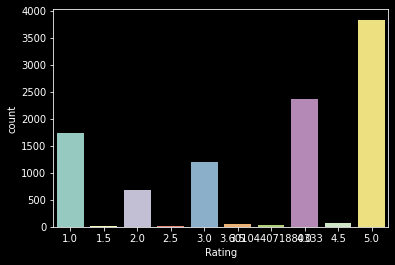

In [33]:
sns.countplot(review.Rating)
plt.show()

In [34]:
review.Year.unique()

array([2019., 2018., 2017., 2016.,   nan])

In [35]:
review.Year.isnull().sum()

38

In [36]:
review['Year']=review['Year'].replace(np.NaN,review['Year'].median())
review['Year'].unique()

array([2019., 2018., 2017., 2016.])

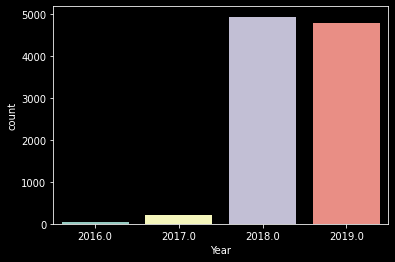

In [37]:
sns.countplot(review.Year)

plt.show()

In [38]:
review.Hour.unique()

array([15., 14., 22., 21.,  1., 23., 20., 19., 10.,  5., 12.,  0.,  7.,
       18.,  3., 16.,  8., 11., 13., 17.,  2.,  9.,  6.,  4., nan])

In [39]:
review['Hour']=review['Hour'].replace(np.NaN,review['Hour'].median())
review['Hour'].unique()

array([15., 14., 22., 21.,  1., 23., 20., 19., 10.,  5., 12.,  0.,  7.,
       18.,  3., 16.,  8., 11., 13., 17.,  2.,  9.,  6.,  4.])

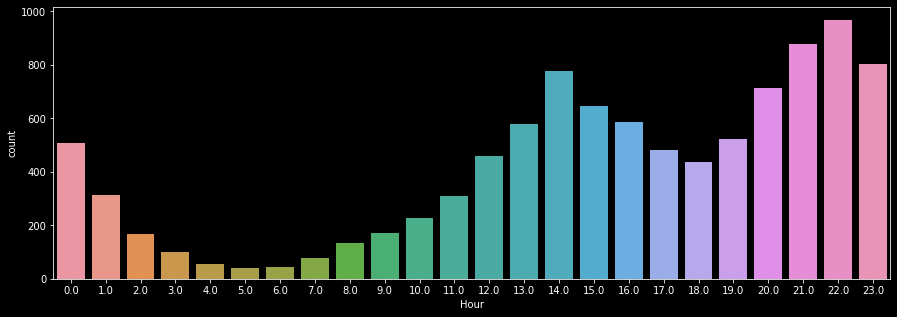

In [40]:
plt.figure(figsize=(15,5))
sns.countplot(review.Hour)
plt.show()

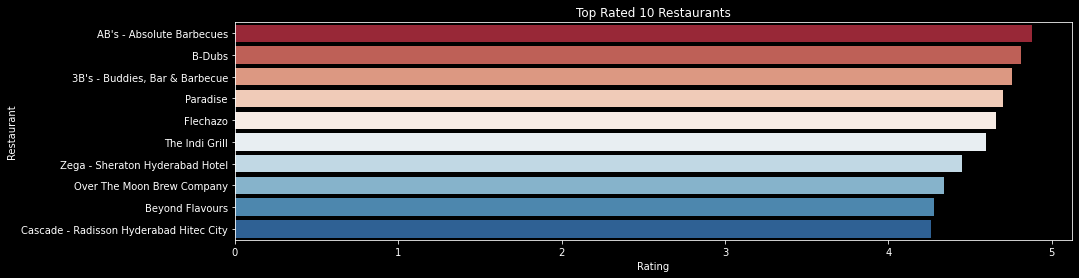

In [41]:
rating_df = review.groupby(['Restaurant'])['Rating'].mean().sort_values(ascending=False).reset_index()
rating_df = rating_df.sort_values(by='Rating', ascending=False).head(10)

plt.figure(figsize=(15,4))
sns.barplot(data=rating_df, x='Rating', y='Restaurant', palette='RdBu')
plt.title('Top Rated 10 Restaurants')
plt.show()

In [42]:
#Checking the top 10 listed restaurants in 2019.

year_avg_rating = review.groupby(['Restaurant', 'Year'])['Rating'].mean().sort_values(ascending = False).reset_index()
twenty_ninteen = year_avg_rating[year_avg_rating.Year == 2019].head(10)
twenty_ninteen

,Restaurant,Year,Rating
0,AB's - Absolute Barbecues,2019.0,4.880000
1,B-Dubs,2019.0,4.810000
2,"3B's - Buddies, Bar & Barbecue",2019.0,4.760000
3,Paradise,2019.0,4.700000
4,Flechazo,2019.0,4.660000
5,Cascade - Radisson Hyderabad Hitec City,2019.0,4.641509
7,The Indi Grill,2019.0,4.600000
8,Karachi Bakery,2019.0,4.538462
10,Zega - Sheraton Hyderabad Hotel,2019.0,4.409091
12,Over The Moon Brew Company,2019.0,4.340000


Above listed restaurants are top 10 restaurants in 2019.


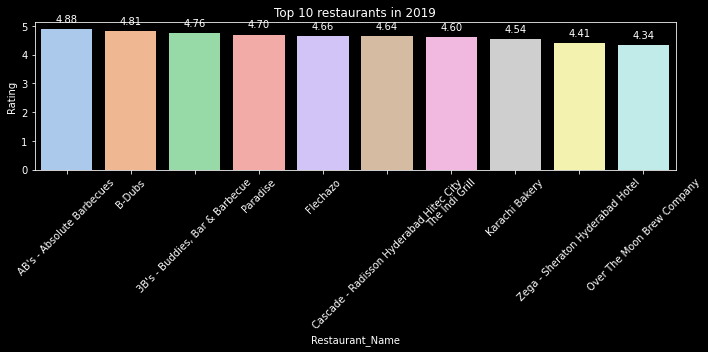

In [43]:
plt.figure(figsize=(10,5))
plot = sns.barplot(twenty_ninteen.Restaurant, twenty_ninteen.Rating, palette='pastel')
for p in plot.patches:
    plt.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., 
                                                   p.get_height()), ha = 'center', va = 'center', 
                   xytext = (0, 10), textcoords = 'offset points')
plt.ylabel('Rating')
plt.xlabel('Restaurant_Name')
plt.xticks(rotation=45)
plt.title('Top 10 restaurants in 2019')
plt.tight_layout()

In [44]:
# Checking the Top 10 restaurants in 2018.

In [45]:
twenty_seventeen = year_avg_rating[year_avg_rating.Year == 2017].head(10)
twenty_seventeen

,Restaurant,Year,Rating
16,KS Bakers,2017.0,4.254717
40,Labonel,2017.0,3.897436
43,Chinese Pavilion,2017.0,3.883333
49,Collage - Hyatt Hyderabad Gachibowli,2017.0,3.833333
117,Dunkin' Donuts,2017.0,3.423077
119,Al Saba Restaurant,2017.0,3.388889
121,T Grill,2017.0,3.382353
123,Cascade - Radisson Hyderabad Hitec City,2017.0,3.357143


There are total 8 Restaurants which gets the rating in 2017.

In [46]:
twenty_sixteen = year_avg_rating[year_avg_rating.Year == 2016].head(10)
twenty_sixteen

,Restaurant,Year,Rating
34,Labonel,2016.0,3.970588
36,Chinese Pavilion,2016.0,3.961538


Labonel and Chinese Pavilion only got the rating in the year 2016.

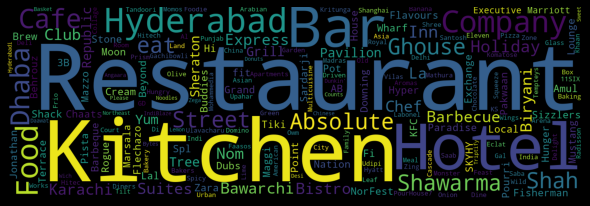

In [69]:
#Creating a word cloud with the restaurant names
rests=restaurant.Name.unique()
rest_str=''
for i in rests:
    rest_str=rest_str+i+' '
wordcloud = WordCloud(width = 1500, height = 500, 
                background_color ='black',  
                min_font_size = 10).generate(rest_str) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

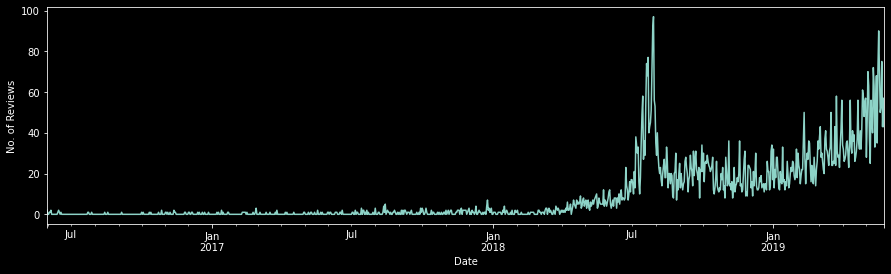

In [47]:
plt.figure(figsize=(15, 4))
review.resample('1D',on='Time')['Reviews'].size().plot.line()
plt.xlabel('Date')
plt.ylabel('No. of Reviews')
plt.show()

A total of 7446 users have sumbitted a review- with each user submitting at an average of 1.3377652430835347 reviews
----------The Top 15 Users who have submitted the most reviews------------
                            Reviewer  Review Count
655                           Ankita            13
3858                     Parijat Ray            13
2654                           Kiran            12
2313                       Jay Mehta            11
7013                    Vedant Killa            11
5958                      Siva Kumar            10
4259                        Priyanka            10
6130                         Sravani            10
3134           Manojkumar D Nambisan            10
265   Age Of Foodies (Suraj Karambe)            10
4133                 Prasun Gokhlani             9
2795                           Kumar             9
2644                 Khushboo Pandey             9
3697                           Nillu             9
4001               Prachita Jayaswal       

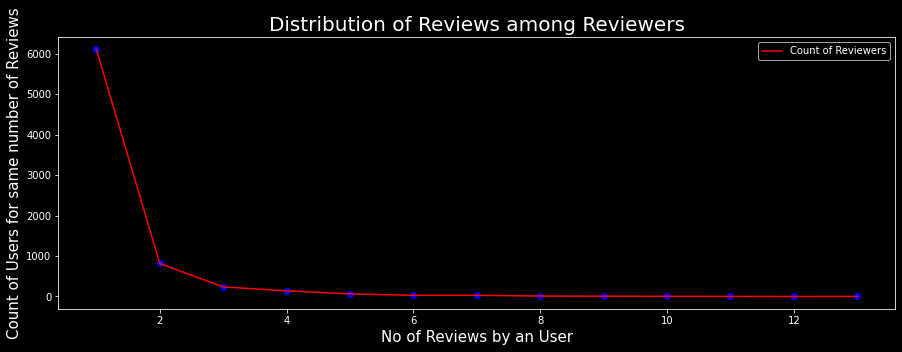

In [66]:
# Identifying the Reviewers who have submitted the highest number of reviews (Top 15)- as well as the review submission distribution curve
top_reviewer=review.groupby('Reviewer').apply(lambda x:x['Reviewer'].count()).reset_index(name='Review Count')
top_reviewer=top_reviewer.sort_values(by='Review Count',ascending=False)
print('A total of {} users have sumbitted a review- with each user submitting at an average of {} reviews'.format(review.Reviewer.nunique(),np.average(review.Reviewer.value_counts())))
print('----------The Top 15 Users who have submitted the most reviews------------')
print(top_reviewer[:15])
top_reviewer_count=top_reviewer.groupby('Review Count').apply(lambda x:x['Review Count'].count()).reset_index(name='Counts')
plt.figure(figsize=(15,5))
plt.plot(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='r')
plt.scatter(top_reviewer_count['Review Count'],top_reviewer_count['Counts'],color='b')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Count of Users for same number of Reviews',size=15)
plt.title('Distribution of Reviews among Reviewers',size=20)
plt.legend(['Count of Reviewers'])
plt.show()

Observation : The distribution presents a very obvious pattern. Since most of the users who have dined/ordered tend to ignore the ratings, the overall distribution shows a great number of count for users who have submitted only 1 reponse- but decreases rapidly upon moving to 2-3 reviews. The chart is appearing as an asymptote towards the higher number of reviews.

A total of 7446 users have sumbitted a rating- with an average rating of-> 3.5789105099842407 
----------Ratings submitted by the Top 15 Users------------
                          Reviewer  Review Count  Average Ratings
0                           Ankita            13         3.923077
1                      Parijat Ray            13         3.192308
2                            Kiran            12         4.500000
3                        Jay Mehta            11         3.727273
4                     Vedant Killa            11         4.000000
5                       Siva Kumar            10         3.600000
6                         Priyanka            10         2.600000
7                          Sravani            10         4.000000
8            Manojkumar D Nambisan            10         3.700000
9   Age Of Foodies (Suraj Karambe)            10         3.500000
10                 Prasun Gokhlani             9         4.000000
11                           Kumar             9     

Text(0.5, 1.0, 'Average Ratings per Review Submitted Distribution')

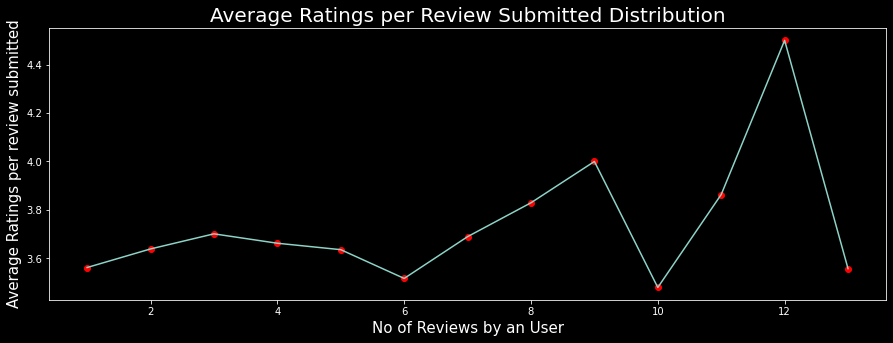

In [71]:
#Reviews vs Ratings Distribution from the list of Reviewers
review_ratings=review.groupby('Reviewer').apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
print('A total of {} users have sumbitted a rating- with an average rating of-> {} '.format(review.Reviewer.nunique(),np.average(review_ratings['Average Ratings'])))
review_ratings=pd.merge(top_reviewer,review_ratings,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviewers=review_ratings[:15]
print('----------Ratings submitted by the Top 15 Users------------')
print(top_reviewers)
review_ratings_plot=review_ratings.groupby('Review Count').apply(lambda x:np.average(x['Average Ratings'])).reset_index(name='Average')
plt.figure(figsize=(15,5))
plt.plot(review_ratings_plot['Review Count'],review_ratings_plot['Average'])
plt.scatter(review_ratings_plot['Review Count'],review_ratings_plot['Average'],color='r')
plt.xlabel('No of Reviews by an User',size=15)
plt.ylabel('Average Ratings per review submitted',size=15)
plt.title('Average Ratings per Review Submitted Distribution',size=20)

Observation: The chart displays almost a comparable rating when the users who have < 5 reviews are considered. But as the number of review increases more than 5, the distribution is much more volatile. One of the primary reasons for this pattern in the chart is the decreasing number of reviewers as the number of review increases- so if one user has provided lower ratings, the overall falls- as can be seen for 10 review users. On the other hand, Only one reviewer was present in the list who submitted 12 responses- and since the average of his/her reviews as pretty good, it is seen as a spike in the chart.

Identifying the Rating pattern of the Top Reviwerers by Restaurants

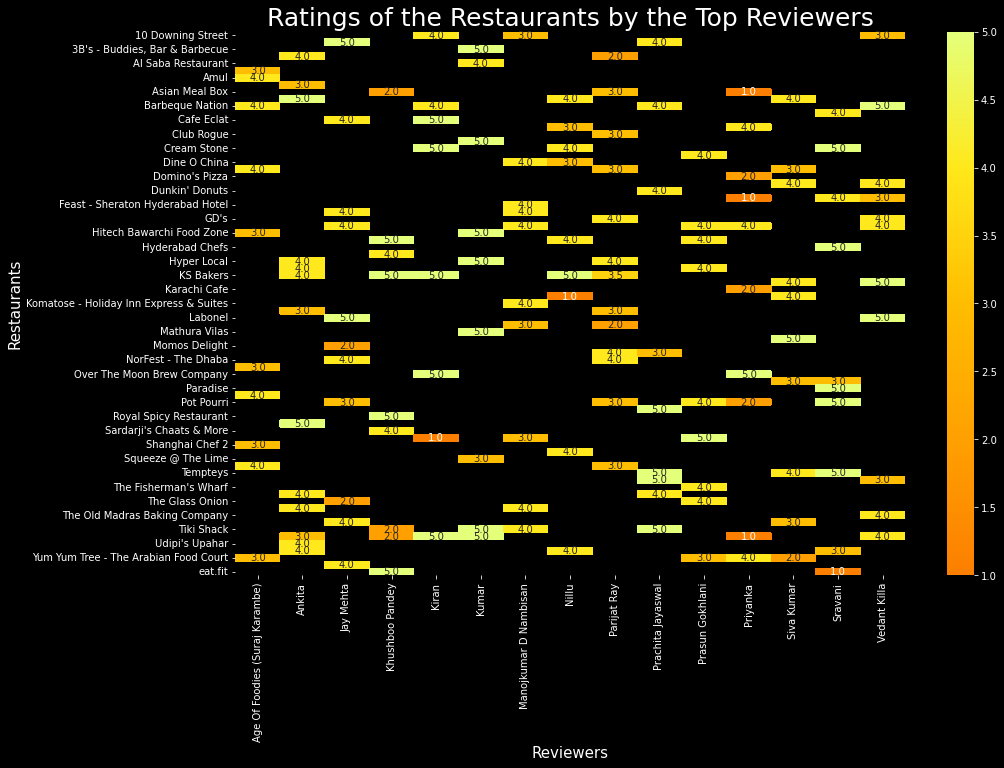

In [73]:
top_reviews=pd.merge(top_reviewers,review,how='inner',left_on='Reviewer',right_on='Reviewer')
top_reviews_avg=top_reviews.groupby(['Reviewer','Restaurant']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
rating_pivot=pd.pivot(top_reviews_avg,values='Average Ratings',index='Restaurant',columns='Reviewer')
rating_pivot.replace(np.NaN,0)
plt.figure(figsize=(15,10))
sns.heatmap(rating_pivot,annot=True,fmt='.1f',cmap='Wistia_r')
plt.xlabel('Reviewers',size=15)
plt.ylabel('Restaurants',size=15)
plt.title('Ratings of the Restaurants by the Top Reviewers',size=25)
plt.show()

Observation: As seen from the User Ratings, 4 is the general average as that has been given out to the restaurants most by the Top Reviewers. 5 depicts extraordinary experience, while 2 and 1 are not satisfactory performances. The sentiment as to why a user gives a rating is dependent on a number of factors- Taste/Quality/Ambience/Quantity/Service etc. So among the restaurants above, the ones which are seen having multiple orders but poor ratings- need to be marked in the poor category, while the ones with more 4 or 5 ratings may be classified as Star Restaurants.

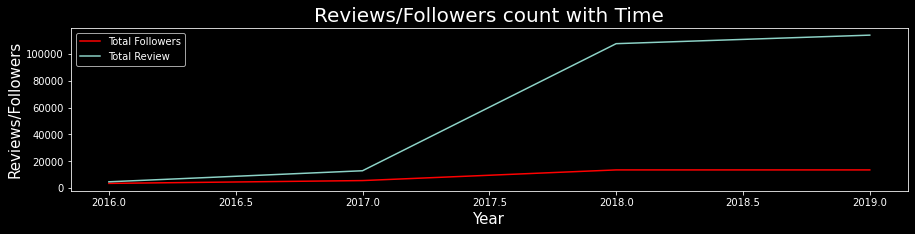

In [82]:
# Reviewer/Follower varitation with time
review['Year'] = pd.DatetimeIndex(review['Time']).year
review_follow_1=review.groupby('Year').apply(lambda x:np.sum(x['Reviews'])).reset_index(name='Total Reviews')
review_follow_2=review.groupby('Year').apply(lambda x:np.max(x['Followers'])).reset_index(name='Total Followers')
review_follow=pd.merge(review_follow_1,review_follow_2,how='inner',left_on='Year',right_on='Year')
plt.figure(figsize=(15,3))
plt.plot(review_follow['Year'],review_follow['Total Followers'],color='r')
plt.plot(review_follow['Year'],review_follow['Total Reviews'])
plt.xlabel('Year',size=15)
plt.ylabel('Reviews/Followers',size=15)
plt.title('Reviews/Followers count with Time',size=20)
plt.legend(['Total Followers','Total Review'])
plt.show()

Observation: The number of Followers and The number of Reviewers are shown by the Years. As expected, the number of reviewers are far more than followers.

In [ ]:
#Creating a word cloud with the restaurant names

In [48]:
cuisine_list = restaurant.Cuisines.str.split(', ') 
cuis_list = {} 
for names in cuisine_list: 
    for name in names:
        if (name in cuis_list):
            cuis_list[name]+=1
        else:  
            cuis_list[name]=1 
cuis_df = pd.DataFrame(cuis_list.values(),index = cuis_list.keys(),columns = {'Counts of Restaurants'}) 
cuis_df.sort_values(by = 'Counts of Restaurants',ascending = False,inplace = True) 
top_10_cuis = cuis_df[0:10]
print('The Top 10 Cuisines are:\n',top_10_cuis)

The Top 10 Cuisines are:
               Counts of Restaurants
North Indian                     61
Chinese                          43
Continental                      21
Biryani                          16
Fast Food                        15
Asian                            15
Italian                          14
Desserts                         13
South Indian                      9
Bakery                            7


In [49]:
#Find the Top 10 cuisines
cuis_df.reset_index(inplace=True)
cuis_df.head()

,index,Counts of Restaurants
0,North Indian,61
1,Chinese,43
2,Continental,21
3,Biryani,16
4,Fast Food,15


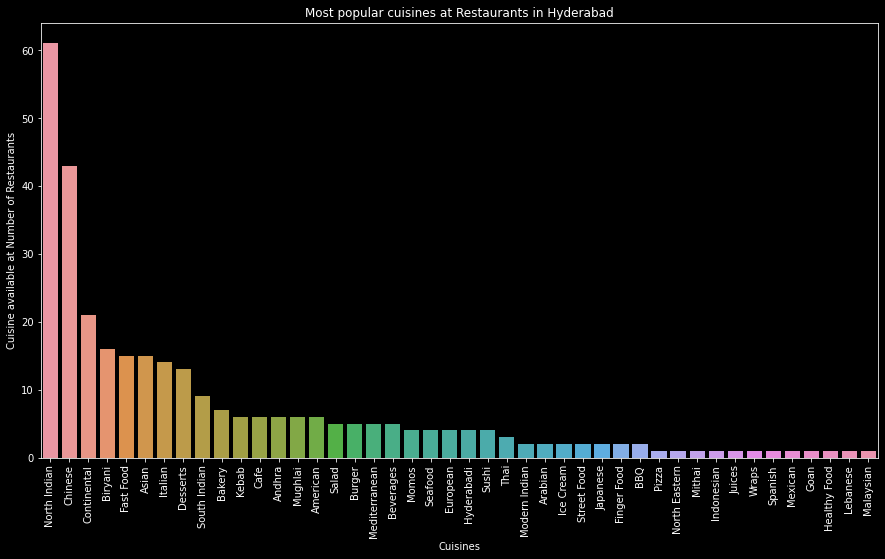

In [50]:
#Plot the Cuisions
fig = plt.figure(figsize=[15,8])
sns.barplot(data=cuis_df, x='index', y= 'Counts of Restaurants')
plt.xlabel('Cuisines')
plt.xticks(rotation=90)
plt.ylabel('Cuisine available at Number of Restaurants')
plt.title('Most popular cuisines at Restaurants in Hyderabad')
plt.show()

Observation: Although located in South India, One of the most dominating Cuisines of Hyderabad is North Indian Food, followed by Chinese and Continental. The Famous Hyderabadi Biriyani is attributed as a cuisine in Itself and holds the 4th position. The number of Cuisines available are huge showing the excellent food options present in Hyderabad- Truly a foodie's Paradise it is!

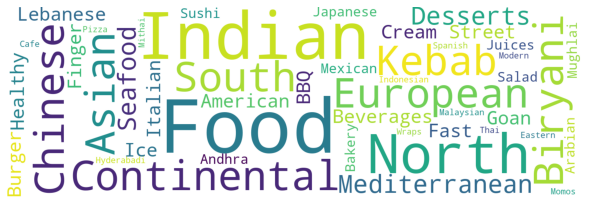

In [51]:
#Generating the Word Cloud using the Cuisines Information
from wordcloud import WordCloud
word_list=cuis_list.keys()
strr=''
for i in word_list:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1500, height = 500, 
                background_color ='white',  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'white') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

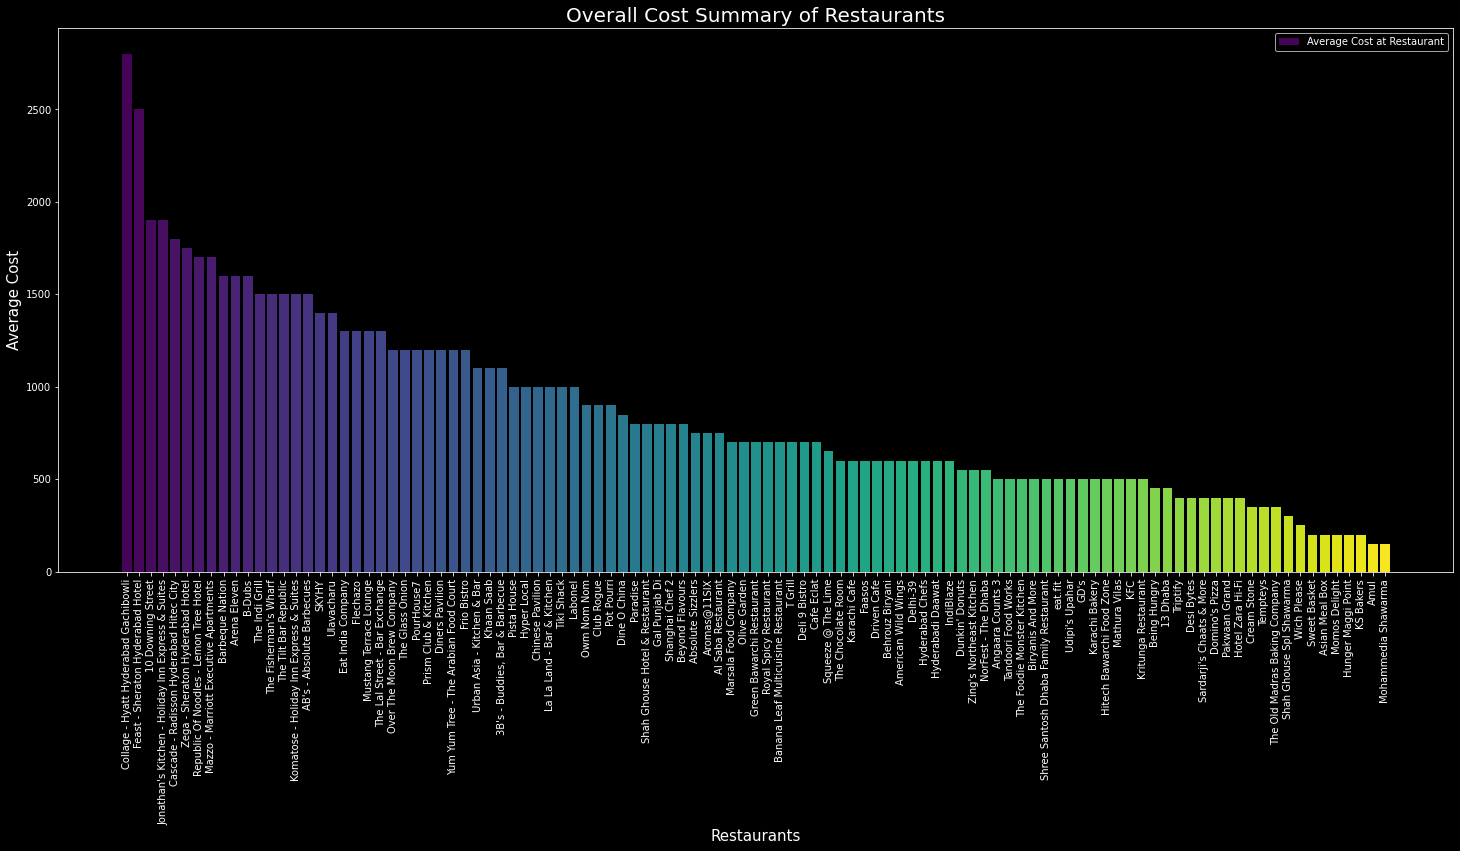

In [52]:
restaurants_cost=restaurant.groupby('Name')['Cost'].mean().reset_index(name='Cost')
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
plt.figure(figsize=(25,10))
plt.bar(restaurants_cost['Name'],restaurants_cost['Cost'], color = sns.color_palette("viridis", len(restaurants_cost['Name'])))
plt.xlabel('Restaurants',size=15)
plt.xticks(rotation=90)
plt.ylabel('Average Cost',size=15)
plt.title('Overall Cost Summary of Restaurants',size=20)
plt.legend(['Average Cost at Restaurant'])
plt.show()

In [53]:
#Checking the how the resturent is costly 
restaurants_cost.sort_values(by='Cost',ascending=False,inplace=True)
restaurants_cost.head(10)

,Name,Cost
23,Collage - Hyatt Hyderabad Gachibowli,2800.0
35,Feast - Sheraton Hyderabad Hotel,2500.0
0,10 Downing Street,1900.0
48,Jonathan's Kitchen - Holiday Inn Express & Suites,1900.0
20,Cascade - Radisson Hyderabad Hitec City,1800.0
102,Zega - Sheraton Hyderabad Hotel,1750.0
74,Republic Of Noodles - Lemon Tree Hotel,1700.0
60,Mazzo - Marriott Executive Apartments,1700.0
14,Barbeque Nation,1600.0
9,Arena Eleven,1600.0


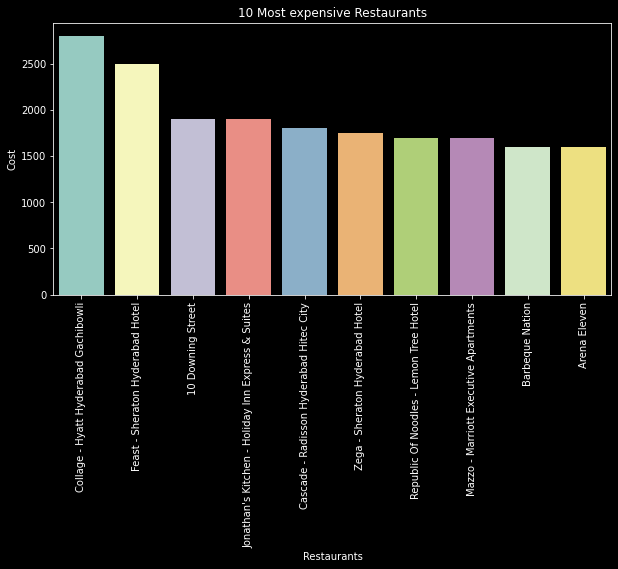

In [54]:
#Ploting the top 10 costly restutent
fig = plt.figure(figsize=[10,5])
sns.barplot(data=restaurants_cost.head(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Most expensive Restaurants')
plt.show()

In [55]:
#Checking the 10 cheapest resturent
restaurants_cost.tail(10)

,Name,Cost
93,The Old Madras Baking Company,350.0
79,Shah Ghouse Spl Shawarma,300.0
100,Wich Please,250.0
83,Sweet Basket,200.0
11,Asian Meal Box,200.0
62,Momos Delight,200.0
43,Hunger Maggi Point,200.0
50,KS Bakers,200.0
7,Amul,150.0
61,Mohammedia Shawarma,150.0


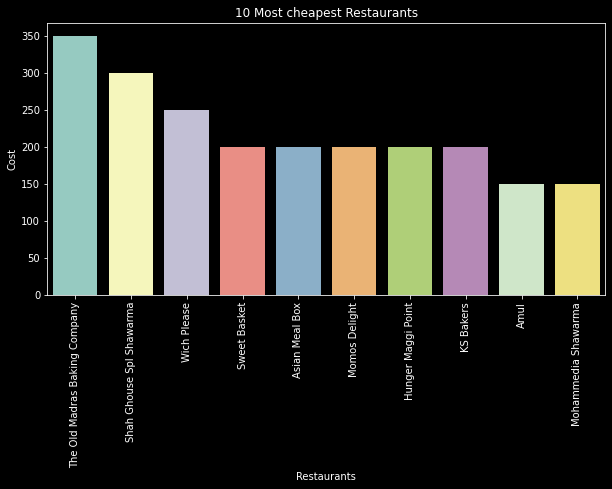

In [56]:
fig = plt.figure(figsize=[10,5])
sns.barplot(data=restaurants_cost.tail(10), x='Name', y= 'Cost')
plt.xlabel('Restaurants')
plt.xticks(rotation=90)
plt.ylabel('Cost')
plt.title('10 Most cheapest Restaurants')
plt.show()

In [57]:
zomato_df=review.merge(restaurant,left_on='Restaurant',right_on='Name').drop('Name',axis=1)
zomato_df.head(2)

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers,Year,Hour,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2.0,2019.0,15.0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2.0,2019.0,14.0,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"


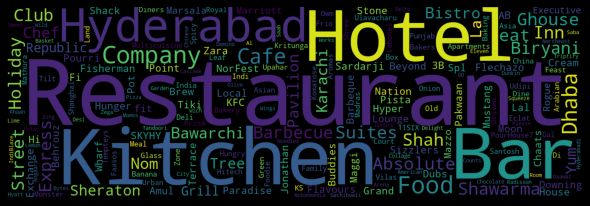

In [60]:
#Creating a word cloud with the restaurant names
rests=restaurant.Name.unique()
rest_str=''
for i in rests:
    rest_str=rest_str+i+' '
wordcloud = WordCloud(width = 1500, height = 500, 
                background_color ='black',  
                min_font_size = 10).generate(rest_str) 
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

The Analysis upon 100 restaurants show- The Average Ratings for Restaurants in Hyderabad is 3.601045583634761
----------------------------------------------
The 5 Best Rated Restaurants are:
                         Restaurant  Average Ratings
3        AB's - Absolute Barbecues             4.88
11                          B-Dubs             4.81
2   3B's - Buddies, Bar & Barbecue             4.76
67                        Paradise             4.70
35                        Flechazo             4.66
----------------------------------------------
The 5 Worst Rated Restaurants are:
           Restaurant  Average Ratings
14   Behrouz Biryani            2.825
57     Mathura Vilas            2.820
66     Pakwaan Grand            2.710
10    Asian Meal Box            2.580
41  Hotel Zara Hi-Fi            2.400
----------------------------------------------


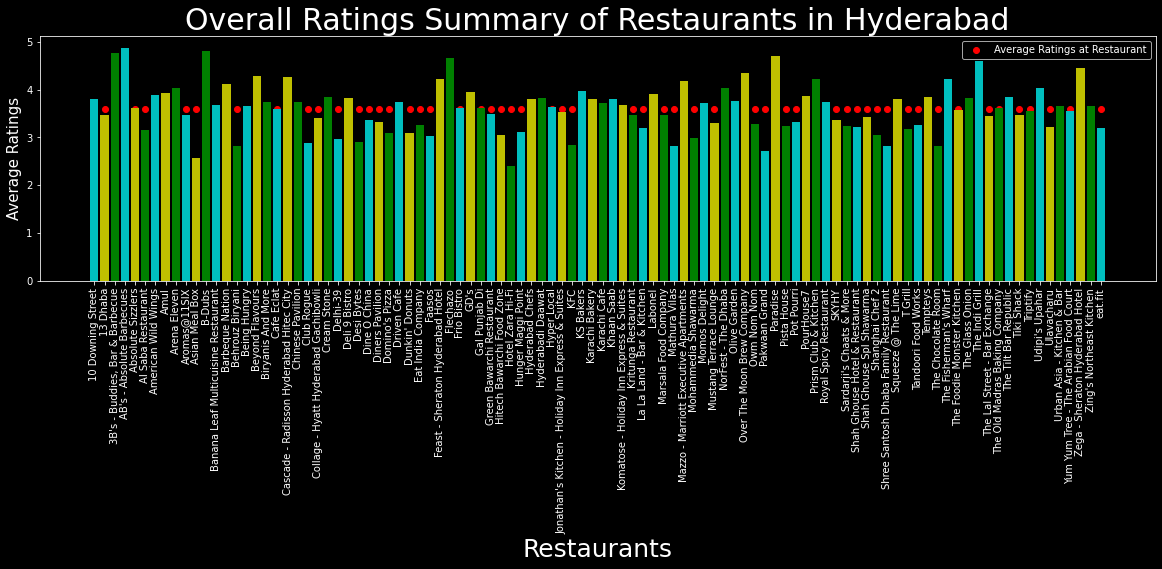

In [84]:
# Average Rating of the Restaurants- Overall
rats=review.groupby("Restaurant").apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Ratings')
avg=np.average(rats['Average Ratings'])
plt.figure(figsize=(20,4.5))
plt.bar(rats["Restaurant"],rats['Average Ratings'],color='cyg')
for i in rats["Restaurant"]:
    plt.scatter(i,avg,color='r')
plt.xlabel('Restaurants',size=25)
plt.xticks(rotation=90)
plt.ylabel('Average Ratings',size=15)
plt.title('Overall Ratings Summary of Restaurants in Hyderabad',size=30)
plt.legend(['Average Ratings at Restaurant'])
rats.sort_values(by='Average Ratings',ascending=False,inplace=True)
print('The Analysis upon {} restaurants show- The Average Ratings for Restaurants in Hyderabad is {}'.format(len(rats),avg))
print('----------------------------------------------')
print('The 5 Best Rated Restaurants are:\n',rats[:5])
print('----------------------------------------------')
print('The 5 Worst Rated Restaurants are:\n',rats[-5:])
print('----------------------------------------------')


Observation: An average of 100 restaurants show that the Average Rating for Restaurants in Hyderabad is 3.6- which is a fairly good depiction that of the Amazing Cuisines in Hyserabad, as well as the standards of Hyderabadi Restaurants. Many restaurants have a rating much higher than 4- which shows a good sign. Let us undersatnd the performance of the Restaurants as an yearwise summary in the below portion.

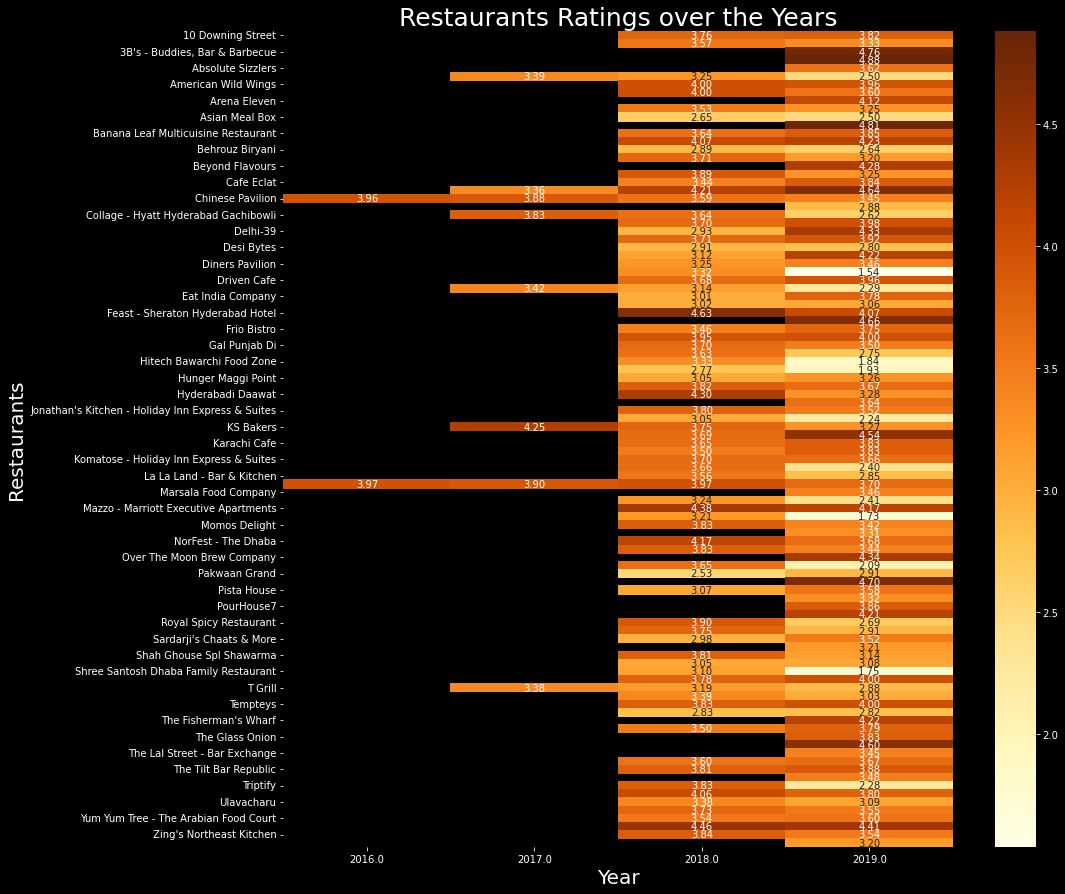

In [88]:
# Average Ratings of Restaurants over the Years
rest_time_rev=review.groupby(['Restaurant','Year']).apply(lambda x:np.average(x['Rating'])).reset_index(name='Average Overall Score')
heatmap_df=pd.pivot(rest_time_rev,values='Average Overall Score',index='Restaurant',columns='Year')
plt.figure(figsize=(15,15))
sns.heatmap(heatmap_df,annot=True,fmt='.2f',cmap='YlOrBr')
plt.xlabel('Year',size=20)
plt.ylabel('Restaurants',size=20)
plt.title('Restaurants Ratings over the Years',size=25)
plt.show()

Observation: The data as seen in the above heatmap can be inferred upon as not being very rich. Only 2 restaurants have review data in 2016 and 7 in 2017. The data is complete and much more available in 2019 for all the restaurants as an average. The above metric also shows as to how the performance of the restaurant has varied over the years.

<b>Distributing the words in the reviews submitted by the Reviewers</b><br>
PS. Removing the punctuation marks first- In order to ease the process of sp,itting the words. Also all the words are converetd into lower case for easily comparing them.

In [90]:
def word_req(strr):
    strs=''
    punctutations=[',','!','@','"',"'",'(',')','/','-','*','$',':',';','#','%','&']
    breaks=['\n','.']
    strr1=strr.lower()
    for i in strr1:
        for j in i:
            if j in punctutations:
                continue 
            elif j in breaks:
                strs=strs+' '
            else:
                strs=strs+j
    return strs

In [91]:
review_list=review.groupby('Review').apply(lambda x:word_req(x['Review'].str).split()).reset_index(name='Words List')
merged_review=pd.merge(review,review_list,how='inner',left_on='Review',right_on='Review')
merged_review

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures,Reviews,Followers,Year,Hour,Words List
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,"1 Review , 2 Followers",2019-05-25 15:54:00,0,1.0,2.0,2019.0,15.0,"[the, ambience, was, good, food, was, quite, g..."
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,"3 Reviews , 2 Followers",2019-05-25 14:20:00,0,3.0,2.0,2019.0,14.0,"[ambience, is, too, good, for, a, pleasant, ev..."
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,"2 Reviews , 3 Followers",2019-05-24 22:54:00,0,2.0,3.0,2019.0,22.0,"[a, must, try, great, food, great, ambience, t..."
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,"1 Review , 1 Follower",2019-05-24 22:11:00,0,1.0,1.0,2019.0,22.0,"[soumen, das, and, arun, was, a, great, guy, o..."
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,"3 Reviews , 2 Followers",2019-05-24 21:37:00,0,3.0,2.0,2019.0,21.0,"[food, is, good, we, ordered, kodi, drumsticks..."
...,...,...,...,...,...,...,...,...,...,...,...,...
9949,Chinese Pavilion,Abhishek Mahajan,Madhumathi Mahajan Well to start with nice cou...,3.0,"53 Reviews , 54 Followers",2016-06-05 00:08:00,0,53.0,54.0,2016.0,0.0,"[madhumathi, mahajan, well, to, start, with, n..."
9950,Chinese Pavilion,Sharad Agrawal,This place has never disappointed us.. The foo...,4.5,"2 Reviews , 53 Followers",2016-06-04 22:01:00,0,2.0,53.0,2016.0,22.0,"[this, place, has, never, disappointed, us, th..."
9951,Chinese Pavilion,Ramandeep,"Bad rating is mainly because of ""Chicken Bone ...",1.5,"65 Reviews , 423 Followers",2016-06-03 10:37:00,3,65.0,423.0,2016.0,10.0,"[bad, rating, is, mainly, because, of, chicken..."
9952,Chinese Pavilion,Nayana Shanbhag,I personally love and prefer Chinese Food. Had...,4.0,"13 Reviews , 144 Followers",2016-05-31 17:22:00,0,13.0,144.0,2016.0,17.0,"[i, personally, love, and, prefer, chinese, fo..."


Text(0.5, 1.0, 'Picture Count in Reviews with Time')

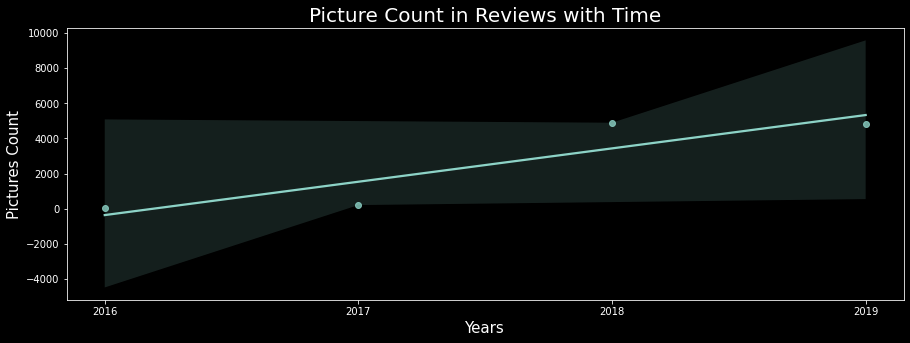

In [92]:
# Identifying the relationship of Pictures in Reviews with the Time
pic_yr=merged_review.groupby('Year').apply(lambda x:x['Pictures'].count()).reset_index(name='Pic Count')
plt.figure(figsize=(15,5))
sns.regplot(pic_yr['Year'],pic_yr['Pic Count'])
plt.xlabel('Years',size=15)
plt.xticks(np.arange(np.min(pic_yr['Year']),np.max(pic_yr['Year'])+1))
plt.ylabel('Pictures Count',size=15)
plt.title('Picture Count in Reviews with Time',size=20)

Observation: As suggested by the pattern shown in the above graph, the number of Pictures being posted with the reviews is increasing with the passing time. People are tending to make their reviews more trending and like- and hence in order to catch an attendtion- Pictures are a great addition.

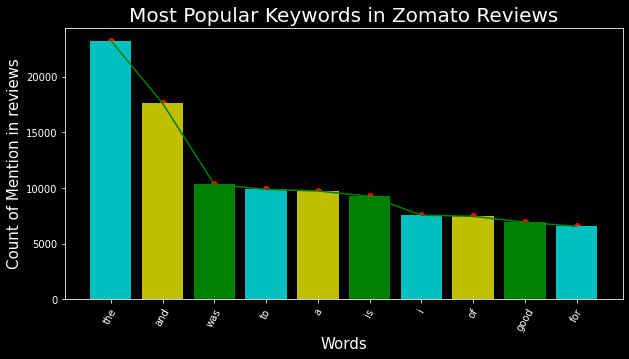

In [94]:
# Identifying the most common words in the reviews
words_list=merged_review['Words List']
reviews={}
for i in words_list:
    for j in i:
        if (j in reviews):
            reviews[j]+=1
        else:
            reviews[j]=1
reviews_df=pd.DataFrame(reviews.values(),index=reviews.keys(),columns={'Counts'})
sorted_reviews_df=reviews_df.sort_values(by='Counts',ascending=False)
top_10_reviews=sorted_reviews_df[0:10]
top_10_reviews.reset_index()
plt.figure(figsize=(10,5))
plt.plot(top_10_reviews.index,top_10_reviews.Counts,color='g')
plt.bar(top_10_reviews.index,top_10_reviews.Counts,color='cyg')
plt.scatter(top_10_reviews.index,top_10_reviews.Counts,color='r')
plt.xlabel('Words',size=15)
plt.xticks(rotation=60)
plt.ylabel('Count of Mention in reviews',size=15)
plt.title('Most Popular Keywords in Zomato Reviews',size=20)
plt.show()

Observation: Some Key Takeaways from this graphical presentation. As expected, The articles and grammartical prepositions and conjunstions have occured most number of time in the reviews. This view gives a wrong estimation. In the following section, we will clean up these words, and then evaluate the words with the most appearences- To hit and identify the ares upon which the Reviewers focus most.

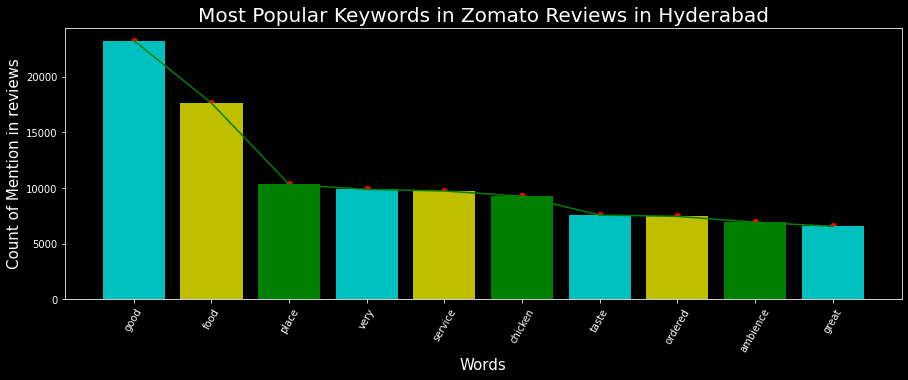

In [104]:
# Creating a word distribution ignoring grammartical add-ons in a statement
articles=['the','a','an']
preposition=['in','on','at','to','for','from','of','with','since','too','by','it','this','that']
conjunction=['and','but','as','also','or','not']
verb=['is','was','are','were','have','had']
noun=['i','we','us','my','he','she','they','you','all']
stop_words=pd.read_fwf('/content/drive/MyDrive/Capstone Project/Unsupervised Machine Learning /stoptext.txt')
modified_reviews=[]
for i in reviews:
    if (i in articles or i in preposition or i in conjunction or i in verb or i in noun or i in stop_words):
        continue
    else:
        modified_reviews.append(i)
modified_reviews_df=pd.DataFrame(index=modified_reviews)
modified_word_list=pd.merge(reviews_df,modified_reviews_df,how='inner',left_index=True,right_index=True)
modified_word_list_sort=modified_word_list.sort_values(by='Counts',ascending=False)
modified_word_list_top10=modified_word_list_sort[:10]
plt.figure(figsize=(15,5))
plt.plot(modified_word_list_top10.index,top_10_reviews.Counts,color='g')
plt.bar(modified_word_list_top10.index,top_10_reviews.Counts,color='cyg')
plt.scatter(modified_word_list_top10.index,top_10_reviews.Counts,color='r')
plt.xlabel('Words',size=15)
plt.xticks(rotation=60)
plt.ylabel('Count of Mention in reviews',size=15)
plt.title('Most Popular Keywords in Zomato Reviews in Hyderabad',size=20)
plt.show()

Observation : The graphical presentation available above with the choice of words makes much more sense as compared to the previous one. The Customers are generally more focussed on Food, Service,Taste and Ambience in that order, as seen in the chart above. Also People have presented many good reviews- which too is an appreciation for Hyderabadi Restaurants.

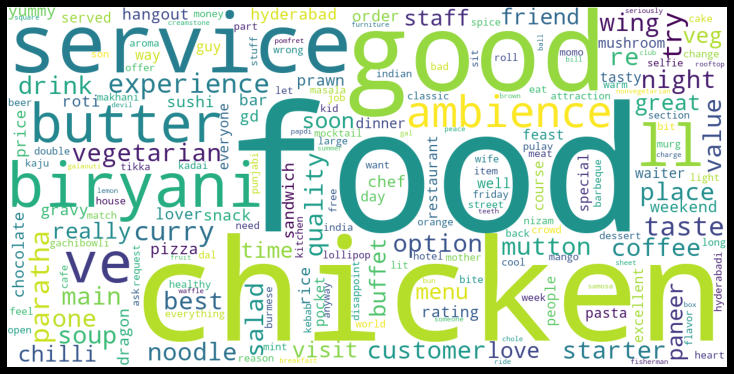

In [106]:
# Creating a Word Cloud with the most common words in the Reviews
review_str=''
for i in modified_reviews:
    review_str=review_str+i+' '
wordcloud = WordCloud(width = 1200, height = 600, 
                background_color ='white',  
                min_font_size = 10).generate(review_str) 
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)

In [ ]:
# Preparing the Sentiment Analysis Words Dataset
#Ingesting the Positive and Negative words for the analysis

In [119]:
positive_df=pd.read_fwf('/content/drive/MyDrive/Capstone Project/Unsupervised Machine Learning /positive-words.txt')
negative_df=pd.read_fwf('/content/drive/MyDrive/Capstone Project/Unsupervised Machine Learning /negative-words.txt')

In [120]:
positive_df.head()

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Positive
2,;
3,; This file contains a list of POSITIVE opinio...
4,;


In [121]:
negative_df.head()

,;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;
0,;
1,; Opinion Lexicon: Negative
2,;
3,; This file contains a list of NEGATIVE opinio...
4,;
